<a href="https://colab.research.google.com/github/tobias-hoepfl/Digital-Organizations-SE/blob/main/assignments/iris_flowers_Hoepfl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Iris classification using simple TLU

**Goal:**

Classify iris flowers based on petal length an width to one of the three kinds using a simple threshold logic unit

<br>

**Sorce of dataset:**

Directly from sklearn datasets. Import done according to https://gist.github.com/srishtis/10d8e8cecfa128ff694bd8846f825135

<br>

**Description of dataset on Kaggle:**

Context:

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines
Content

The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).
Acknowledgements

This dataset is free and is publicly available at the UCI Machine Learning Repository 

##Preparation

In [ ]:
#Imports
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [ ]:
#import directly from sklearn
iris = datasets.load_iris()
iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target

iris_df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
iris_df.dropna(how="all", inplace=True)

##Data exploration and visualization

In [ ]:
iris_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
iris_df['class'].value_counts()
#50 of each kind

0    50
1    50
2    50
Name: class, dtype: int64

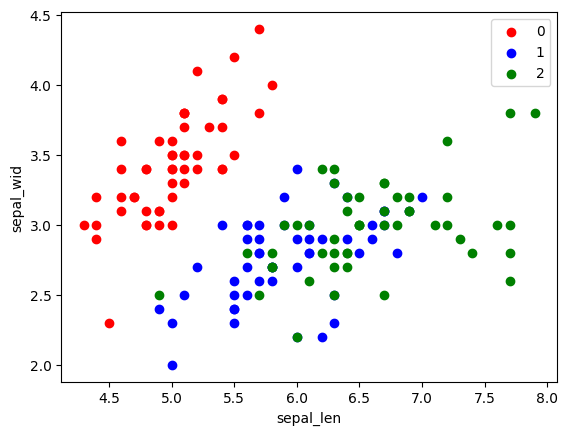

In [ ]:
#Scatter plot
fig, ax = plt.subplots()
cdict = {0: 'red', 1: 'blue', 2: 'green'}
for iris_class in iris_df['class'].unique():
  d = iris_df[iris_df['class'] == iris_class]
  ax.scatter(x='sepal_len', y = 'sepal_wid', c=cdict[iris_class], label = iris_class, data=d)
ax.legend()
ax.set_xlabel('sepal_len')
ax.set_ylabel('sepal_wid')
plt.show()

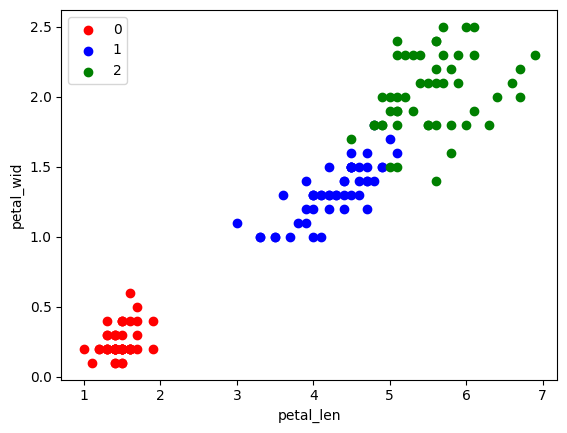

In [ ]:
#Scatter plot
fig, ax = plt.subplots()
cdict = {0: 'red', 1: 'blue', 2: 'green'}
for iris_class in iris_df['class'].unique():
  d = iris_df[iris_df['class'] == iris_class]
  ax.scatter(x='petal_len', y = 'petal_wid', c=cdict[iris_class], label = iris_class, data=d)
ax.legend()
ax.set_xlabel('petal_len')
ax.set_ylabel('petal_wid')
plt.show()

Observation:

Sepal:
- Class 0 seems to be easily linearily separable from the others
- For classes 1 and 2 this seems to be more difficult

Petals:
- Also classes 1 and 2 seem to have less overlaps -> so we will continue using only petals for our classification algorithm

In [ ]:
#remove sepal features
iris_df = iris_df.drop(['sepal_len', 'sepal_wid'], axis = 1)

,petal_len,petal_wid,class
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
5,1.7,0.4,0
6,1.4,0.3,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [ ]:
iris_df

,petal_len,petal_wid,class
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
5,1.7,0.4,0
6,1.4,0.3,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [ ]:
#separate train set and test set
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(iris_df, test_size=0.2, random_state=42)

In [ ]:
#Transform to Pytorch tensors
train_tensor = torch.tensor(train_set.values)

#features
x = train_tensor[:,0:2]

#target labels
y = train_tensor[:,2]

In [ ]:
#Same TLU as in assignment (i.e., using sigmoid step function)
def f(x, params):
    a,b,c = params
    return 1/(1+torch.exp(a*x[:,0] + b*x[:,1] + c))

print(f(x, [3,-2,1]))

tensor([7.5045e-06, 8.1626e-03, 8.2938e-06, 4.4963e-03, 9.9518e-03, 2.5045e-07,
        2.2603e-06, 3.3720e-06, 2.7320e-03, 4.0701e-03, 6.6929e-03, 5.5883e-08,
        9.1660e-06, 3.7266e-06, 5.0304e-06, 1.3674e-05, 7.5240e-07, 4.5517e-06,
        1.0987e-02, 1.1195e-05, 1.2373e-05, 4.4963e-03, 1.0987e-02, 1.6701e-05,
        6.6929e-03, 6.0598e-03, 4.4963e-03, 2.2603e-06, 5.5595e-06, 6.1442e-06,
        4.4963e-03, 9.9518e-03, 6.8080e-07, 1.3387e-02, 7.5045e-06, 9.1898e-07,
        8.1626e-03, 1.6701e-05, 1.6745e-06, 1.4774e-02, 2.2544e-05, 8.3153e-07,
        1.0103e-04, 1.2405e-06, 3.7169e-05, 6.7904e-06, 6.0598e-03, 3.7460e-08,
        2.2544e-05, 1.0130e-05, 6.6929e-03, 3.3632e-05, 7.4846e-05, 1.0987e-02,
        6.1442e-06, 4.9668e-03, 9.9518e-03, 3.0511e-06, 1.2373e-05, 1.2373e-05,
        3.0590e-07, 4.1292e-07, 6.1442e-06, 6.0598e-03, 9.0133e-03, 2.2603e-06,
        9.1898e-07, 4.9668e-03, 7.3915e-03, 1.3387e-02, 1.2373e-05, 1.8554e-07,
        8.1626e-03, 2.0452e-06, 5.0435e-

In [ ]:
#Loss function: MAE

def mae(preds, targets): return (abs(preds-targets)).mean()

mae((f(x, [3,-2,1])), y)
#should be minimized

tensor(1.0365, dtype=torch.float64)

In [ ]:
#stochastic gradient descent (compare assignment and fastAI)
#learning rate
lr = 0.1

#parameters are initialized randomly
params = torch.randn(3).requires_grad_()

def apply_step(params, prn=True):
    #calculate predictions
    preds = f(x, params)
    #calculate loss with function defined before
    loss = mae(preds, y)
    #calculate gradient
    loss.backward()
    #parameters are updated using the learning rate and the gradient
    params.data -= lr * params.grad.data
    params.grad = None
    #Print parameters and current loss
    if prn: print(params);print(loss.item())
    return preds

#We apply it 1000 times (to account for smaller learning rate)
for i in range(10000): apply_step(params)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
tensor([-2.1365, -3.9356,  8.3509], requires_grad=True)
0.3558790374852307
tensor([-2.1366, -3.9357,  8.3512], requires_grad=True)
0.3558779661550503
tensor([-2.1367, -3.9358,  8.3515], requires_grad=True)
0.35587689783589677
tensor([-2.1368, -3.9359,  8.3518], requires_grad=True)
0.35587583009011386
tensor([-2.1369, -3.9360,  8.3521], requires_grad=True)
0.35587476248564326
tensor([-2.1370, -3.9361,  8.3524], requires_grad=True)
0.3558736950224656
tensor([-2.1371, -3.9362,  8.3527], requires_grad=True)
0.35587262770056144
tensor([-2.1372, -3.9363,  8.3530], requires_grad=True)
0.3558715605199116
tensor([-2.1372, -3.9364,  8.3533], requires_grad=True)
0.3558704934804965
tensor([-2.1373, -3.9365,  8.3536], requires_grad=True)
0.35586942658229687
tensor([-2.1374, -3.9366,  8.3539], requires_grad=True)
0.3558683598252934
tensor([-2.1375, -3.9367,  8.3542], requires_grad=True)
0.35586729320946686
tensor([-2.1376, -3.9368,  

In [ ]:
#Observation: algorithm gets stuck at 0.3551473626990808 MAE

In [ ]:
preds = f(x, params)

print(preds)

y

#It can distinguish 0-flowers very well from the others 
#The Problem seems to be, that only two classes can be distinguished -> Maybe one TLU is not enough

tensor([1.0000e+00, 4.7224e-04, 1.0000e+00, 1.0760e-03, 7.9962e-04, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0527e-02, 2.7474e-03, 2.7885e-04, 1.0000e+00,
        9.9997e-01, 1.0000e+00, 9.9999e-01, 9.9989e-01, 1.0000e+00, 1.0000e+00,
        3.1280e-04, 9.9998e-01, 9.9954e-01, 1.0760e-03, 3.1280e-04, 9.9931e-01,
        3.0809e-03, 7.1288e-04, 1.0760e-03, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0760e-03, 7.9962e-04, 1.0000e+00, 5.2972e-04, 1.0000e+00, 1.0000e+00,
        4.7224e-04, 9.9994e-01, 1.0000e+00, 2.0718e-04, 9.9991e-01, 1.0000e+00,
        9.9926e-01, 1.0000e+00, 9.9907e-01, 9.9998e-01, 7.1288e-04, 1.0000e+00,
        9.9991e-01, 9.9999e-01, 2.7885e-04, 9.9963e-01, 9.9458e-01, 3.1280e-04,
        1.0000e+00, 4.2099e-04, 7.9962e-04, 1.0000e+00, 9.9996e-01, 1.0000e+00,
        1.0000e+00, 1.0000e+00, 9.9999e-01, 7.1288e-04, 2.0425e-03, 1.0000e+00,
        1.0000e+00, 4.6447e-03, 1.2069e-03, 5.2972e-04, 9.9996e-01, 1.0000e+00,
        4.7224e-04, 1.0000e+00, 1.0000e+

tensor([2., 0., 2., 0., 0., 2., 2., 2., 0., 0., 0., 2., 1., 2., 1., 1., 2., 2.,
        0., 1., 1., 0., 0., 1., 0., 0., 0., 2., 1., 2., 0., 0., 2., 0., 1., 2.,
        0., 1., 2., 0., 1., 2., 1., 2., 1., 1., 0., 2., 1., 1., 0., 1., 1., 0.,
        2., 0., 0., 1., 1., 1., 2., 2., 1., 0., 0., 2., 2., 0., 0., 0., 1., 2.,
        0., 2., 2., 0., 1., 1., 2., 1., 2., 0., 2., 1., 2., 1., 1., 1., 0., 1.,
        1., 1., 1., 2., 0., 1., 1., 0., 2., 2., 0., 2., 0., 1., 2., 2., 2., 2.,
        1., 1., 2., 2., 0., 1., 2., 0., 1., 2.], dtype=torch.float64)